WNIXALO | data cleaning | 20181028

---

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *

Number of files downloaded per class:

In [3]:
path = Path().home()/'data/aircraft/train'

In [4]:
classes = [c.name for c in path.iterdir() if c.is_dir()]

In [7]:
len(classes)

28

In [53]:
print(f"{'FIGHTER':<10}| COUNT\n{'-'*10}+{'-'*8}")
for c in classes:
    print(f'{c+"":<10}| {len((path/c).ls())}')

FIGHTER   | COUNT
----------+--------
rafale    | 392
f4        | 500
f15c      | 499
mig21     | 500
f16       | 380
typhoon   | 391
su27      | 500
f15e      | 499
jas39     | 500
f35       | 388
su24      | 488
su34      | 483
fa18ef    | 500
su25      | 500
mig29     | 500
fa18c     | 500
mig31     | 500
f14       | 500
f22       | 500
su57      | 381
a10       | 500
su30      | 386
j20       | 499
fighters  | 500
cargo     | 387
mig25     | 374
su22      | 382
tornado   | 391


In [75]:
c = classes[0]

In [85]:
i = 0

In [86]:
fname = ((path/c)).ls()[i]

rafale / 48. 243120964-e1539792550961.jpg


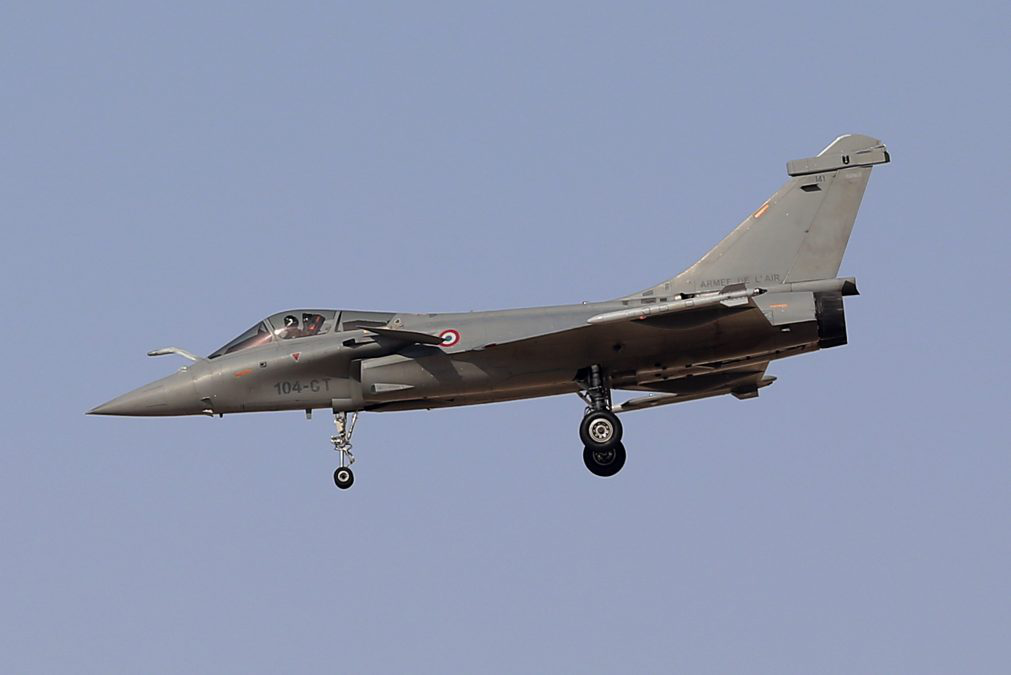

In [89]:
print(c,'/',fname.name)
open_image(fname)

Alrighty.. here's what I can do then:

In [90]:
k = 0
c = classes[k]
i = 0
files = sorted((path/c).ls())

In [96]:
files[:4]

[PosixPath('/home/jupyter/data/aircraft/train/rafale/1. gj-rafale-002.jpg'),
 PosixPath('/home/jupyter/data/aircraft/train/rafale/10. rafale.jpg'),
 PosixPath('/home/jupyter/data/aircraft/train/rafale/100. dassault_rafale_b_03.jpg'),
 PosixPath('/home/jupyter/data/aircraft/train/rafale/101. egypt-rafale-03-dassault-692x360.png')]

## Another way to do this:

Doing manual loops was taking too long. I can scan over a bunch of pictures and type in the indices of those that shouldn't be there.

In [949]:
for rem in removes['rafale']:
    os.remove(path/'rafale'/rem)

A more automated way to get rid of corrupted images:

In [954]:
# from: https://thesmithfam.org/blog/2012/10/25/temporarily-suppress-console-output-in-python/
# Suppress Print Output
from contextlib import contextmanager

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [955]:
with suppress_stdout():
    verify_images(path/c, delete=True, max_workers=8)

In [958]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

rafale


f4


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


f15c


mig21


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


f16


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


typhoon


su27


f15e


jas39


f35


su24


su34


fa18ef


su25


mig29


fa18c


mig31


f14


f22


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


su57


a10


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


su30


j20


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


fighters


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cargo


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


mig25


su22


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/jupyter/data/aircraft/train/su22/64. be7ebc02a8e8ae2dd44b71e22bfb746b.jpg'


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/jupyter/data/aircraft/train/su22/112. 8715bb705558ff34dd710364ddece99b.jpg'
cannot identify image file '/home/jupyter/data/aircraft/train/su22/238. telemmglpict000155708937_trans_nvbqzqnjv4bqpvlberwd9egfpztclimqfyf2a9a6i9ychsjmeadba08.jpeg'
cannot identify image file '/home/jupyter/data/aircraft/train/su22/73. 5a33a316fc7e93675d8b4568.jpg'


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/jupyter/data/aircraft/train/su22/134. telemmglpict000155708966_trans_nvbqzqnjv4bqpvlberwd9egfpztclimqfyf2a9a6i9ychsjmeadba08.jpeg'
tornado


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/jupyter/data/aircraft/train/tornado/40. fire-tornado.jpg'


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/jupyter/data/aircraft/train/tornado/198. tornado.jpg'


cannot identify image file '/home/jupyter/data/aircraft/train/tornado/114. tornado-sighting-south-saskatchewan.jpg'
cannot identify image file '/home/jupyter/data/aircraft/train/tornado/325. tornado-alonsa.jpg'


/opt/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/jupyter/data/aircraft/train/tornado/46. sochi-138750495__.jpg'
cannot identify image file '/home/jupyter/data/aircraft/train/tornado/115. water_tornado.png'
cannot identify image file '/home/jupyter/data/aircraft/train/tornado/80. 5b6aebf4dda4c8ce788b4620.png'
cannot identify image file '/home/jupyter/data/aircraft/train/tornado/365. ?media_id=1954812548082708.jpg'


In [959]:
c

'tornado'

In [1028]:
fnames

['1. tornadoes%20new%20map%20921_1537554830943.png_56333399_ver1.0_640_360.jpg',
 '10. tornado-e1540304996787.jpg',
 '100. rozel%20tornado%202013.jpg',
 '101. 9-scientistsus.jpg',
 '102. tornado_scottsbluff.png',
 '103. 636661442496386866-ap-picturesque-tornado.jpg',
 '104. 5b6b0e2d5379fe2aec09b879.jpg',
 '105. tornado.jpg',
 '106. photo%20-%20elk%20city%20tornado%20forming%20-%20051617%20-%20photo%20by%20gabriel%20garfield%20-%201920%20x%201280%20-%20landscape.jpg',
 '107. tornado.png',
 '108. tornado-edited-153204056863300002.jpg',
 '109. tornado-thinkstock-2017-dl.jpg',
 '11. how-to-prepare-for-a-tornado-damage.jpg',
 '110. wyoming_ef3_tornado_suzanne_hansen.jpg',
 '111. 170106162952_1_540x360.jpg',
 '112. tornado+severeweather+mgn.jpg']

In [1050]:
# adapted from fastai.vision.data.show_image_batch
figsize=(15,15)
rows = 4
c
n = rows**2
fi = 0

files = np.array(sorted((path/c).ls()))
fnames = files[fi:fi+n]
# imgs = [(open_image(f).data.numpy() * 255).astype(np.int32) for f in fnames]
imgs = [open_image(f).data for f in fnames]
fnames = [f.name.split()[0] for f in fnames]
fidxs = torch.tensor([i for i in range(len(fnames))])

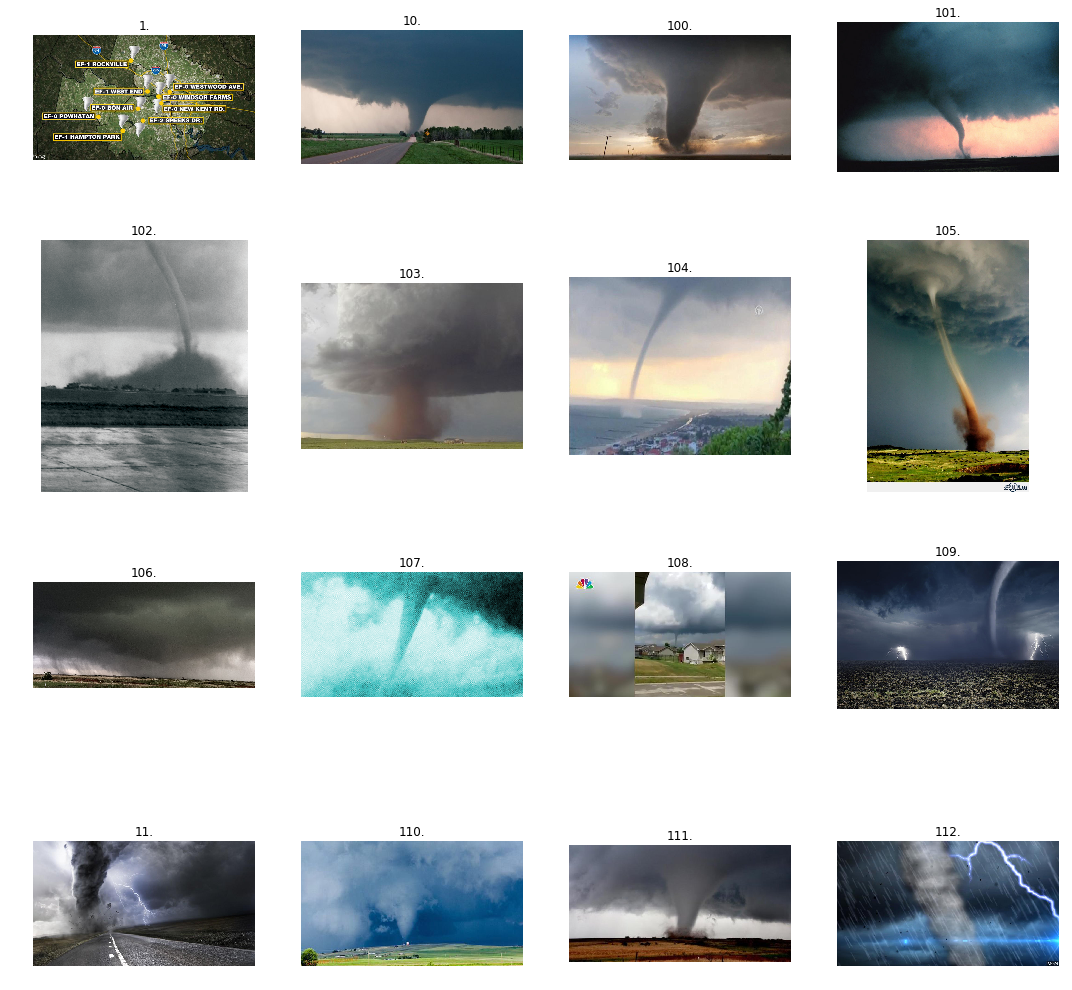

In [1051]:
show_images(imgs, fidxs, rows, fnames, figsize)

Okay great. Time to do this in a clean notebook.

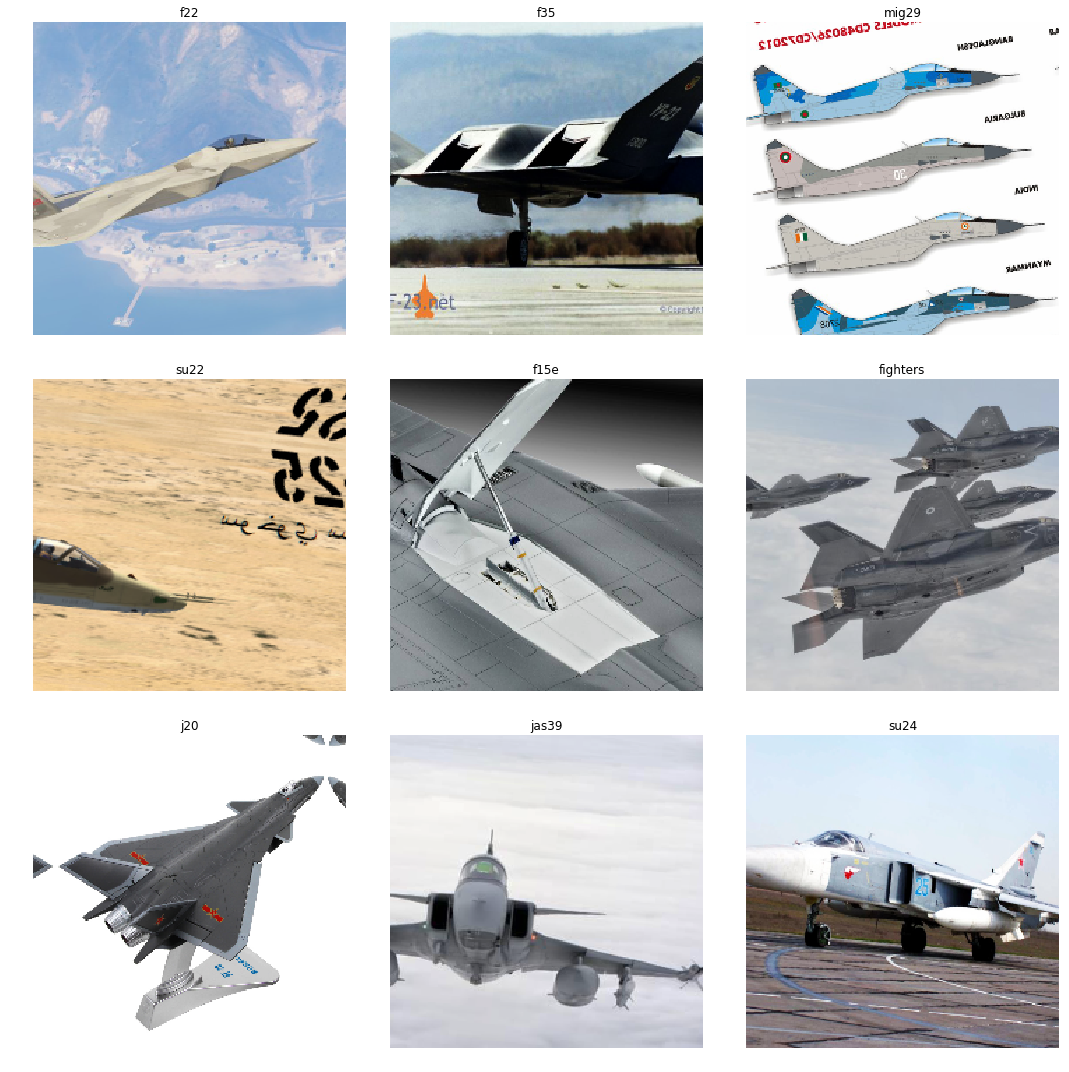

In [965]:
data.show_batch(rows=3, figsize=(15,15))

## Example of old way:

## MANUAL LOOP:

### INIT

In [119]:
removes = defaultdict(lambda : [])
ci = 0 # class index
fi = 0 # file index

### OUTER LOOP (classes)

---

In [120]:
c = classes[ci]
files = sorted((path/c).ls())

### INNER LOOP (files)

---

rafale'/'99. fighterjet_660_040718121925_092418040023_092618071942.jpg     ----------     392/392


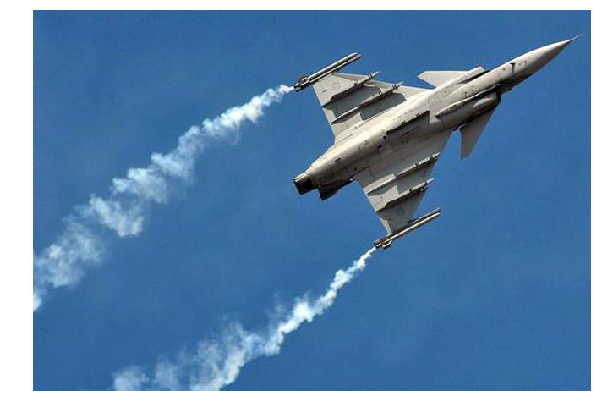

In [919]:
f = files[fi]
print(f"{c}'/'{f.name}{'-'*10:^20}{fi+1}/{len(files)}")
try: show_image(open_image(f), figsize=(10,10))
except OSError:
    removes[c].append(f.name)
    print(f"OSError. {f.name} added to removals list.",'\nRERUN THIS CELL'*10)
    fi += 1

In [920]:
inpt = input(f"Does this belong in {c}? (y/n/q:quit): ")
inpt = str(inpt[0]).lower() if len(inpt) > 0 else '0'
if inpt == 'n':
    removes[c].append(f.name)
    print(f"{f.name} added to removals list.")
if inpt == 'q': fi -= 1
inpt = '0'
fi += 1
if fi == len(files): print('ALL FILES SCANNED')

Does this belong in rafale? (y/n/q:quit):  n


99. fighterjet_660_040718121925_092418040023_092618071942.jpg added to removals list.
ALL FILES SCANNED


---

In [117]:
ci += 1
if ci == len(classes): print('ALL CLASSES SCANNED')

defaultdict(<function __main__.<lambda>()>, {})

---

In [921]:
removes

defaultdict(<function __main__.<lambda>()>,
            {'rafale': ['108. rafale_anil_ambani_pti.jpeg',
              '110. files-france-aviation-defence-rafale_7dbc4012-815f-11e6-aff8-24833d3d422c.jpg',
              '118. dossier_historique_crash_du_rafale-00_00_54_11-3397819.jpg',
              '128. 7079640_rafale-vs-f35.jpg',
              '131. maxresdefault.jpg',
              '134. typhoon-696x405.jpg',
              '14. dassault_660_102618040015.jpg',
              '153. 60102439.cms',
              '156. eurofighter-typhoon-vs-dassault-rafale.jpg',
              '157. vs.jpg',
              '160. rafale_092818120945.jpg',
              '169. ob_909a3b_b301-1384-gopro-p3g-2r.jpg',
              '170. 350px-dassault_rafale_version.svg.png',
              '171. rafale-jetfighter_d6329fde-6a79-11e8-8033-47bccc77d658.jpg',
              '172. qatar-rafale-dq01.jpg',
              '192. 101482-11185-pristine.jpg',
              '197. ?media_id=22264578085.jpg',
              '203.